<h1>Ensemble Learning and Random Forests</h1> 
<h5>In this script I am going to explore the previously mentioned topics and apply what I learned to the following datasets:<a href="https://www.kaggle.com/nareshbhat/health-care-data-set-on-heart-attack-possibility">Heart Attack Data (Classification)</a>, <a href="https://www.kaggle.com/adityadesai13/used-car-dataset-ford-and-mercedes/tasks?taskId=1258?">Car Price (Regression)</a>, and MNIST</h5

<h2>What have I learned so far?</h2>

In [640]:
# ensemble method from the following classifiers
# ensemble methods perform best when the models are trained on different parts of the dataset and if the models are very different
# from each other

# Most of the following code is based off of https://github.com/ageron/handson-ml 

In [641]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [642]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [643]:
log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC(probability = True)

hard_voting_clf = VotingClassifier(
    estimators = [('lr',log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting = 'hard')

soft_voting_clf = VotingClassifier(
    estimators = [('lr',log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting = 'soft')
soft_voting_clf = soft_voting_clf.fit(X_train, y_train)

In [644]:
print("Hard Voting Accuracy: ", accuracy_score(y_test, soft_voting_clf.predict(X_test)))

Hard Voting Accuracy:  0.912


In [645]:
# accuracy of all the classifiers
for clf in (log_clf, rnd_clf, svm_clf, hard_voting_clf, soft_voting_clf):
    clf.fit(X_train, y_train)
    print("{} Accuracy: {}".format(clf.__class__.__name__,\
                                   accuracy_score(y_test, clf.predict(X_test))))

LogisticRegression Accuracy: 0.864
RandomForestClassifier Accuracy: 0.888
SVC Accuracy: 0.896
VotingClassifier Accuracy: 0.904
VotingClassifier Accuracy: 0.92


In [646]:
# Bagging and Decision Tree classifier

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [647]:
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train, y_train)
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators = 500, 
    max_samples = 100, bootstrap = True, n_jobs = -1, oob_score = True)  # bootstrap == bagging | n_jobs == how fast it trains
bag_clf.fit(X_train, y_train)
print("OOB Score: ", bag_clf.oob_score_)
print("Bagged Acc: ",accuracy_score(y_test, bag_clf.predict(X_test)))

OOB Score:  0.9226666666666666
Bagged Acc:  0.912


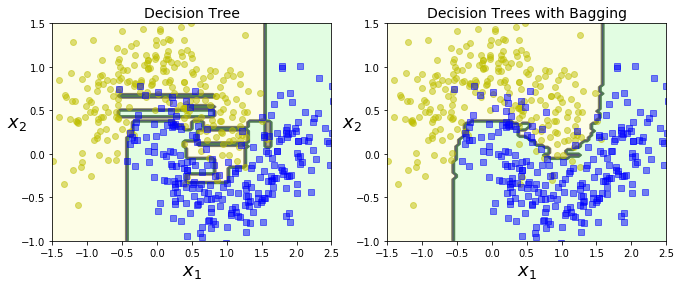

In [648]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes = [-1.5, 2.5, -1, 1.5], alpha=0.5, contour = True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100) # create initial values for meshgrid
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha = 0.3, cmap = custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", alpha=alpha)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    
plt.figure(figsize=(11,4))
plt.subplot(121)
plot_decision_boundary(tree_clf, X, y)
plt.title("Decision Tree", fontsize=14)
plt.subplot(122)
plot_decision_boundary(bag_clf, X, y)
plt.title("Decision Trees with Bagging", fontsize=14)
#save_fig("decision_tree_without_and_with_bagging_plot")
plt.show()
    

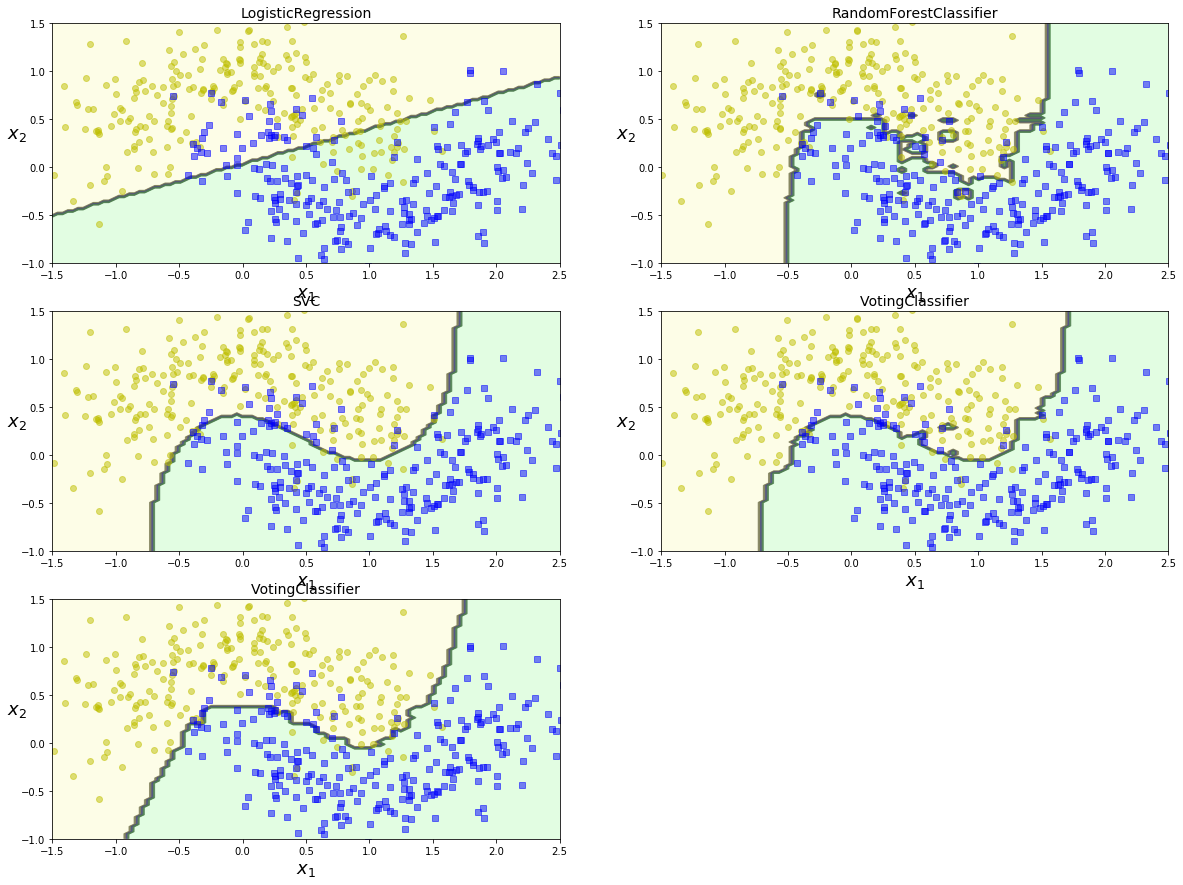

In [649]:
plt.figure(figsize = (20, 15))
for i, clf in enumerate([log_clf, rnd_clf, svm_clf, hard_voting_clf, soft_voting_clf]):
    clf.fit(X_train, y_train)
    plt.subplot(3, 2, i+1)
    plot_decision_boundary(clf, X, y)
    plt.title("{}".format(clf.__class__.__name__), fontsize = 14)
plt.show()

Text(0.5, 1.0, 'RandomForestClassifier')

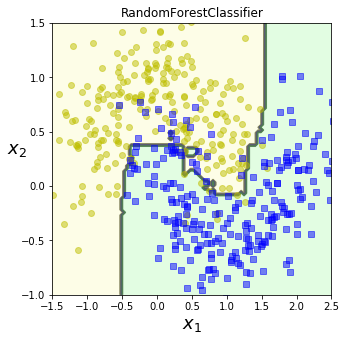

In [650]:
# RANDOM FORESTS

from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators = 500, max_leaf_nodes = 16, n_jobs = -1)
rnd_clf.fit(X_train, y_train)
plt.figure(figsize = (5, 5))
plot_decision_boundary(rnd_clf, X, y)
plt.title(rnd_clf.__class__.__name__)

In [651]:
# Boosting: Adaboost and Gradient Boosting
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingRegressor

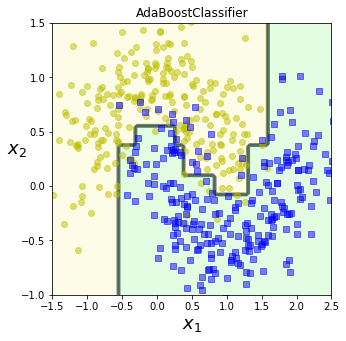

Ada Accuracy:  0.896


In [652]:
ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=300, 
    algorithm = "SAMME.R", learning_rate = .05)
ada_clf.fit(X_train, y_train)
plt.figure(figsize = (5, 5))
plot_decision_boundary(ada_clf, X, y)
plt.title(ada_clf.__class__.__name__)
plt.show()
print("Ada Accuracy: ", accuracy_score(y_test, ada_clf.predict(X_test)))

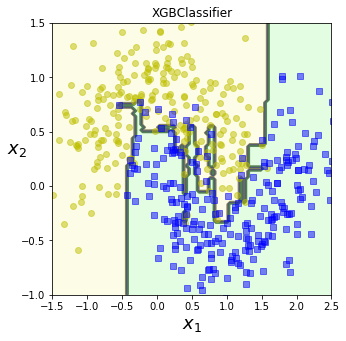

Ada Accuracy:  0.872


In [653]:
# XGBoost 
from xgboost import XGBClassifier

xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)
plt.figure(figsize = (5, 5))
plot_decision_boundary(xgb_clf, X, y)
plt.title(xgb_clf.__class__.__name__)
plt.show()
print("Ada Accuracy: ", accuracy_score(y_test, xgb_clf.predict(X_test)))

<h3>First Example: <a href="https://www.kaggle.com/nareshbhat/health-care-data-set-on-heart-attack-possibility">Heart Attack Data (Classification)</a></h3> 

In [74]:
data = pd.read_csv("heart_attack_data/heart.csv")
X = data.iloc[:,:-1]
y = data.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [75]:
"""
1) test Voting (hard and soft), decision tree, bagging, random forest, and all components of voting (log, svc, decision tree) 
        on data that hasn't been cleaned yet. 
2) look at feature importance of data.
3) oob evaluation
4) adaboost

"""

"\n1) test Voting (hard and soft), decision tree, bagging, random forest, and all components of voting (log, svc, decision tree) \n        on data that hasn't been cleaned yet. \n2) look at feature importance of data.\n3) oob evaluation\n"

In [82]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [90]:
svc_clf = SVC(probability = True)
dtc_clf = DecisionTreeClassifier()
rfc_clf = RandomForestClassifier()
lr_clf = LogisticRegression()

soft_vote = VotingClassifier([
    ('svc', svc_clf), ('dtc', dtc_clf), \
    ('rfc_clf', rfc_clf), ('lr', lr_clf)
], voting = 'soft')

hard_vote = VotingClassifier([
    ('svc', svc_clf), ('dtc', dtc_clf), \
    ('rfc_clf', rfc_clf), ('lr', lr_clf)
], voting = 'hard')

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators = 500, max_samples = 100,\
    bootstrap = True, n_jobs = -1
)

for c, clf in enumerate([svc_clf, dtc_clf, rfc_clf, lr_clf, soft_vote, hard_vote, bag_clf]):
    clf.fit(X_train, y_train)
    print("{}({}) Accuracy: {}".format(clf.__class__.__name__, accuracy_score(y_test,\
                                                                         clf.predict(X_test))))

SVC Accuracy: 0.6973684210526315
DecisionTreeClassifier Accuracy: 0.7763157894736842
RandomForestClassifier Accuracy: 0.8421052631578947
LogisticRegression Accuracy: 0.881578947368421
VotingClassifier Accuracy: 0.8552631578947368
VotingClassifier Accuracy: 0.868421052631579
BaggingClassifier Accuracy: 0.8421052631578947


In [93]:
rnd_clf.feature_importances_

array([0.42034585, 0.57965415])

In [98]:
# feature import

rnd_clf = RandomForestClassifier(n_estimators = 100, n_jobs = -1)
rnd_clf.fit(X_train, y_train)
for name, score in zip(X_train.columns, rnd_clf.feature_importances_):
    print(name, score, sep = '\t')

age	0.08348333927272293
sex	0.0287605890043427
cp	0.11058642685470589
trestbps	0.07690819329395066
chol	0.07240508128791599
fbs	0.009116691547135953
restecg	0.020719644538223822
thalach	0.10906032365498732
exang	0.07550125048275445
oldpeak	0.11366887669594597
slope	0.05578056779437039
ca	0.14605386597472414
thal	0.09795514959821981


In [100]:
print("{}Accuracy: {}".format(rnd_clf.__class__.__name__, accuracy_score(y_test,\
                                                                         rnd_clf.predict(X_test))))

RandomForestClassifierAccuracy: 0.8421052631578947


In [103]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators = 500, max_samples = 100,\
    bootstrap = True, n_jobs = -1, oob_score = True
)
bag_clf.fit(X_train, y_train)
print(bag_clf.oob_score_)        # predicted accuracy
print("Accuracy: {}".format(accuracy_score(y_test, bag_clf.predict(X_test))))  # actual accuracy

0.8281938325991189
Accuracy: 0.8421052631578947


In [110]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
        DecisionTreeClassifier(max_depth = 1), n_estimators = 150, \
        algorithm = 'SAMME.R', learning_rate = .01
)

ada_clf.fit(X_train, y_train)
print("Accuracy: {}".format(accuracy_score(y_test, ada_clf.predict(X_test)))) 

Accuracy: 0.8421052631578947


In [114]:
from sklearn.model_selection import GridSearchCV

parameters = {'n_estimators':np.arange(100, 500, 50), 'learning_rate':np.arange(0.005, 1, .005)}
best_clf = GridSearchCV(ada_clf,parameters,n_jobs = -1,scoring='accuracy', verbose=10)
best_clf.fit(X_train, y_train)


Fitting 5 folds for each of 1592 candidates, totalling 7960 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    9.4s
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:   10.4s
[Parallel(n_jobs=-1)]: Done  61 tasks      | elapsed:   11.9s
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:   14.1s
[Parallel(n_jobs=-1)]: Done  89 tasks      | elapsed:   15.3s
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:   17.1s
[Parallel(n_jobs=-1)]: Done 121 tasks      | elapsed:   19.3s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   21.0s
[Parallel(n_jobs=-1)]: Done 157 tasks      | elapsed:   23.5s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   25.4s
[Parallel(n_jobs=-1)]: Done 197 tasks      | elapsed:  

NameError: name 'best' is not defined

In [115]:
print("Accuracy: {}".format(accuracy_score(y_test, best_clf.predict(X_test)))) 

Accuracy: 0.8289473684210527


<h3>Second Example: <a href="https://www.kaggle.com/adityadesai13/used-car-dataset-ford-and-mercedes/tasks?taskId=1258">Car Price (Regression)</a></h3>

In [706]:
# broken. Code was deleted, so I have to go back and look at what isn't working
import glob

df_list = []
for file in glob.glob("car_price/*.csv"):
    df = pd.read_csv(file)
    car_type = np.array([[file[10:file.index('.csv')]]*df.shape[0]]).reshape(-1, 1)
#     print(df.head())
    df["car_type"] = car_type
    col_names = df.columns
    df_list.append(df)

In [707]:
df_list[0]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,car_type
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4,audi
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0,audi
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4,audi
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0,audi
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0,audi
...,...,...,...,...,...,...,...,...,...,...
10663,A3,2020,16999,Manual,4018,Petrol,145,49.6,1.0,audi
10664,A3,2020,16999,Manual,1978,Petrol,150,49.6,1.0,audi
10665,A3,2020,17199,Manual,609,Petrol,150,49.6,1.0,audi
10666,Q3,2017,19499,Automatic,8646,Petrol,150,47.9,1.4,audi


In [708]:
# clean data
"""
1) convert european car prices to dollars and mileage2 to miles
2) replace na with specific values (either the majority of their subset or something else)
3) classification with a whole bunch of stuff
4) 

"""


car_df = pd.concat(df_list, ignore_index = True)

car_df["fuel_type"] = car_df["fuelType"].fillna(car_df["fuel type"])
car_df["fuel_type"] = car_df["fuelType"].fillna(car_df["fuel type2"])
car_df = car_df.drop(columns = ["fuelType", "fuel type", "fuel type2"])

pounds = car_df['price'][car_df["price"].astype(str).str.contains(" £")]
pounds_to_dollars = car_df['price'][car_df["price"].astype(str).str.contains(" £")].replace('[ £,]', '', regex=True).astype(int)*1.26
p_to_dol_map = {k:v for k, v in zip(pounds, pounds_to_dollars)}
# print(p_to_dol_map)
car_df["price"] = car_df["price"].replace(p_to_dol_map)
# print(car_df["price"])
car_df = car_df.dropna(subset = ["price"])

car_df['tax'] = car_df['tax'].fillna(car_df["tax(£)"]*1.26)  # tax is in dollars and 1.26 is the conversion rate

car_df['tax'] = car_df["tax"].fillna(car_df["price"].astype(int)*.01)


# car_df["tax"] = car_df["tax"].interpolate(method = car_df["price"])

In [709]:
car_df[car_df['mpg'].isna()]

,model,year,price,transmission,mileage,tax,mpg,engineSize,car_type,tax(£),engine size,mileage2,engine size2,reference,fuel_type
21449,C Class,2020.0,30495.0,Automatic,1200,304.95,NaN,2.0,cclass,NaN,NaN,NaN,NaN,NaN,Diesel
21450,C Class,2020.0,29989.0,Automatic,1000,299.89,NaN,1.5,cclass,NaN,NaN,NaN,NaN,NaN,Petrol
21451,C Class,2020.0,37899.0,Automatic,500,378.99,NaN,2.0,cclass,NaN,NaN,NaN,NaN,NaN,Diesel
21452,C Class,2019.0,30399.0,Automatic,5000,303.99,NaN,2.0,cclass,NaN,NaN,NaN,NaN,NaN,Diesel
21453,C Class,2019.0,29899.0,Automatic,4500,298.99,NaN,2.0,cclass,NaN,NaN,NaN,NaN,NaN,Diesel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89356,Focus,2019.0,23618.7,Manual,NaN,236.18,NaN,NaN,unclean focus,NaN,2,"7,855",NaN,/ad/25149519,NaN
89357,Focus,2019.0,20601.0,Manual,NaN,206.01,NaN,NaN,unclean focus,NaN,1,"13,891",NaN,/ad/25149523,NaN
89358,Focus,2019.0,21231.0,Manual,NaN,212.31,NaN,NaN,unclean focus,NaN,1,"13,452",NaN,/ad/25149532,NaN
89359,Focus,2019.0,21810.6,Automatic,NaN,218.10,NaN,NaN,unclean focus,NaN,1,"13,376",NaN,/ad/25149535,NaN


In [710]:
car_df['engine size'] = car_df.fillna(car_df["engineSize"])
car_df['engine size'] = car_df.fillna(car_df["engine size2"])
car_df = car_df.drop(columns = ["engineSize", "engine size2"])

car_df['mileage'] = car_df["mileage"].fillna(car_df["mileage2"])
car_df = car_df.drop(columns = ['reference', 'engine size','mileage2', 'tax(£)'])

In [711]:
car_df['price'] = car_df['price'].astype(int)
car_df['mileage'] = pd.to_numeric(car_df["mileage"].replace('[ Unknown,]', '', regex=True))
car_df = car_df.dropna(subset = ['mileage'])
car_df['tax'] = car_df['tax'].astype(float)
# car_df["fuel_type"] = car_df["fuel_type"].fillna()

In [712]:
# fillna for MPG and Fuel_type

mpg_na = dict(((mod,int(car_df.loc[car_df['model'] == mod]['mpg'].mode()[0])) for mod in car_df.model.unique()))
car_df['mpg'] = car_df.apply(lambda row: mpg_na[row.model] if np.isnan(row.mpg) else row.mpg, axis = 1)

fuel_type_na = dict(((mod,(car_df.loc[car_df['model'] == mod]['fuel_type'].mode()[0])) for mod in car_df.model.unique()))
car_df['fuel_type'] = car_df.apply(lambda row: fuel_type_na[row.model] if np.isnan(row.mpg) else row.mpg, axis = 1)

In [678]:
car_df = car_df.dropna(axis = 0)

In [741]:
test_df = pd.concat((car_df.drop(columns = ["car_type",'transmission','model']), pd.get_dummies(car_df['car_type'])), axis = 1)
test_df = test_df.dropna(axis = 0)

In [760]:
car_df

,model,year,price,transmission,mileage,tax,mpg,car_type,fuel_type
0,A1,2017.0,12500,Manual,15735.0,150.0,55.4,audi,55.4
1,A6,2016.0,16500,Automatic,36203.0,20.0,64.2,audi,64.2
2,A1,2016.0,11000,Manual,29946.0,30.0,55.4,audi,55.4
3,A4,2017.0,16800,Automatic,25952.0,145.0,67.3,audi,67.3
4,A3,2019.0,17300,Manual,1998.0,145.0,49.6,audi,49.6
...,...,...,...,...,...,...,...,...,...
118145,Eos,2012.0,5990,Manual,74000.0,125.0,58.9,vw,58.9
118146,Fox,2008.0,1799,Manual,88102.0,145.0,46.3,vw,46.3
118147,Fox,2009.0,1590,Manual,70000.0,200.0,42.0,vw,42.0
118148,Fox,2006.0,1250,Manual,82704.0,150.0,46.3,vw,46.3


In [743]:
# random forest classifier
# svr
# ada boost
# bagging 
# other models

# xgboost regression
# look at performance for cars that are the most popular


In [769]:
X_train.astype(int)

array([[ 2019,  1000,   365,    64,    64],
       [ 2016, 21037,    37,    61,    61],
       [ 2015, 62710,     0,    74,    74],
       ...,
       [ 2019,  9600,   145,    37,    37],
       [ 2020,   556,   145,    47,    47],
       [ 2020,  3530,   145,    40,    40]])

In [770]:
y_car = car_df["price"].values.reshape(-1, 1)
X_car = car_df.drop(columns = ['price','model','transmission','car_type']).values.astype(int)
print(X_car.shape, y_car.shape)

(117990, 5) (117990, 1)


In [771]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse

In [772]:
X_train, X_test, y_train, y_test = train_test_split(X_car, y_car, random_state= 42)

In [773]:
reg = RandomForestRegressor(max_depth = 15, random_state = 42, n_jobs = -1, n_estimators= 300)
reg.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=15, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=300, n_jobs=-1, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [774]:
pred = reg.predict(X_test)
print("MSE: {}".format(mse(y_test, pred)))

MSE: 28497486.82288859


In [755]:
print(pred[:10].astype(int), y_test[:10].reshape(1,-1),sep = '\n')

[10405 17353 18997  6931  6734 23893 10494 17110 31198 17320]
[[10699 17110 17991  6782  7498 21890 10499 16329 31199 17999]]


In [756]:
print(np.abs(pred - y_test).mean())

9835.060174570921


In [776]:
# MNIST data 
from sklearn.datasets import load_digits
data = load_digits()

In [793]:
X = data["images"].reshape(1797, -1)
y = data["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [813]:
from sklearn.ensemble import VotingClassifier
rand_clf = RandomForestClassifier(n_estimators = 500, n_jobs = -1)
svc_clf = SVC(probability = True)
ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth = 1), n_estimators = 500, 
    learning_rate=0.5
    )

voting_clf = VotingClassifier(
    estimators = [('svc', svc_clf), ("rf",rand_clf), ('ada', ada_clf)], 
    voting = 'soft'
)

rand_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [814]:
pred = rand_clf.predict(X_test)
acc(y_test, pred)

0.9688888888888889

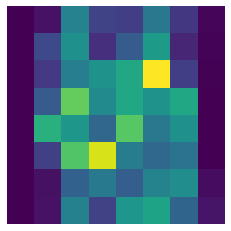

In [817]:
def plot_digit(data):
    image = data.reshape(8, 8)
    plt.imshow(image, cmap = 'viridis',
               interpolation="nearest")
    plt.axis("off")
plot_digit(rand_clf.feature_importances_)